In [ ]:
# To install shap, through Anaconda prompt/Jupyter Terminal/Command prompt
# conda install conda=forge::shap
# pip install shap

In [4]:
# Importing packages/functions
# For tabular data
import pandas as pd
# For generic maths
import numpy as np
from numpy import absolute
# Modeling
from sklearn.tree import DecisionTreeRegressor
# Metrics / Functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
# Shap
import shap
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# For reproducibility
seed = 7

In [5]:
# Importing the dataset
mydata = pd.read_csv('E:SLTechDocs/Data/Lake2.csv')


In [ ]:
# Exploration of the dataset

In [7]:
mydata.head()

,T,ET,AT,P,SM,LL
0,1/1/1993,0.000015,21.98,7.936,184.207,281.535000
1,2/1/1993,0.000011,24.86,3.472,170.824,281.163333
2,3/1/1993,0.000015,28.36,37.200,163.860,280.925000
3,4/1/1993,0.000026,29.18,181.440,170.926,280.750000
4,5/1/1993,0.000032,29.03,373.860,189.816,280.585000


In [8]:
mydata.shape

(240, 6)

In [ ]:
# Output and input data preparation

In [9]:
# The output or target variable, y
y = mydata['LL']

In [10]:
y.head()

0    281.535000
1    281.163333
2    280.925000
3    280.750000
4    280.585000
Name: LL, dtype: float64

In [11]:
y.shape

(240,)

In [12]:
# Theinput variables or features, X
X = mydata.drop(['T', 'LL'], axis = 1)

In [13]:
X.head()

,ET,AT,P,SM
0,0.000015,21.98,7.936,184.207
1,0.000011,24.86,3.472,170.824
2,0.000015,28.36,37.200,163.860
3,0.000026,29.18,181.440,170.926
4,0.000032,29.03,373.860,189.816


In [14]:
X.shape

(240, 4)

In [ ]:
# For research purposes, please run the VIF analysis and scale / standardize the featuree before the next step

In [15]:
# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [17]:
# To check the dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 4) (72, 4) (168,) (72,)


In [ ]:
############## Decision Tree Regression ################
# Please run the hyperparameter tuning using your own dataset to get the parameters

In [18]:
# Model instantiation
model = DecisionTreeRegressor(max_depth = 6, max_leaf_nodes = 50, min_samples_leaf = 2, min_samples_split = 6 )

In [19]:
# Fitting the model using training dataset
rt = model.fit(X_train, y_train)

In [23]:
# Training model evaluation
y_predtr = rt.predict(X_train)
print('The training r-sq is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-sq is: 0.7544600986389521
The training MAE is: 0.15843302389022945
The training MSE is: 0.05148194169759836


In [28]:
# The testing model evaluation
y_predts = rt.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE is:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.185791912020562
The testing MAE is: 0.28846974715708584
The testing MSE is: 0.1605664920927862


In [ ]:
# k-fold cross-validation

In [29]:
# On the training model
tr_cv = cross_val_score(rt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [30]:
tr_cv

array([-0.40589497, -0.14365871, -0.16776912, -0.28381333, -0.16138897,
       -0.14488927, -0.38542746, -0.27272603, -0.24746459, -0.11093624])

In [31]:
# The absolute mean error
print('The absolute mean training error is:', absolute(np.mean(tr_cv)))

The absolute mean training error is: 0.2323968679028432


In [32]:
# On the testing model
ts_cv = cross_val_score(rt, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [33]:
ts_cv

array([-0.16154225, -0.16683719, -0.27315154, -0.12658299, -0.23247498,
       -0.38287715, -0.12842724, -0.16699074, -0.37473882, -0.38368089])

In [34]:
# The absolute mean score
print('The absolute mean testing cv score is:', absolute(np.mean(ts_cv)) )

The absolute mean testing cv score is: 0.23973037878073686


In [35]:
############ SHAP Analysis ######################
shap.initjs()

In [36]:
# Creating an explainer on the training dataset 
explainer = shap.TreeExplainer(rt, X_train)

In [37]:
### Calculating the shap values on the training dataset
shap_valuestr = explainer.shap_values(X_train)

In [38]:
shap_valuestr # To output the shap values

array([[-4.42274857e-02,  2.19338989e-01,  9.95975876e-02,
         1.48900986e-01],
       [-2.40343475e-02,  3.37487335e-01, -1.66119289e-01,
         1.83528328e-01],
       [ 1.86405182e-02,  1.01130524e-01,  1.70840187e-01,
        -1.64500313e-01],
       [-9.69748688e-02, -2.51621094e-01,  1.51760101e-02,
        -1.18213081e-01],
       [-1.26102409e-01,  6.24124146e-02, -4.08369503e-01,
         1.08154755e-01],
       [-9.69748688e-02, -2.51621094e-01,  1.51760101e-02,
        -1.18213081e-01],
       [-2.53569450e-01, -3.97558746e-01,  1.32481384e-02,
        -7.62385178e-02],
       [ 9.86901093e-02,  1.91213379e-01,  1.75746727e-01,
        -1.72781754e-01],
       [-1.35957756e-01, -7.17117310e-03, -2.89840908e-01,
         6.90663147e-02],
       [-2.53569450e-01, -3.97558746e-01,  1.32481384e-02,
        -7.62385178e-02],
       [ 3.39997101e-02, -4.09655609e-01,  2.50283051e-02,
        -7.22378540e-02],
       [ 8.82598114e-02,  1.70792847e-01,  2.62511292e-01,
      

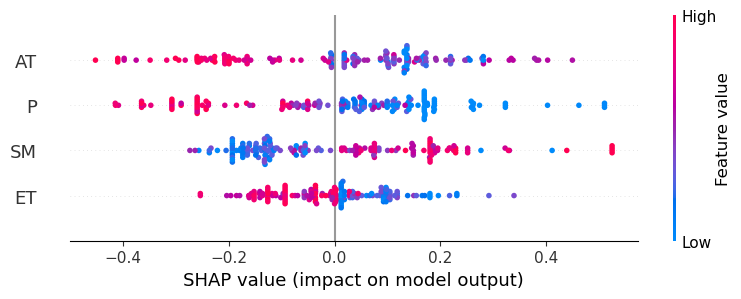

In [40]:
# Summary plot: combination of feature importance and feature effect plots
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

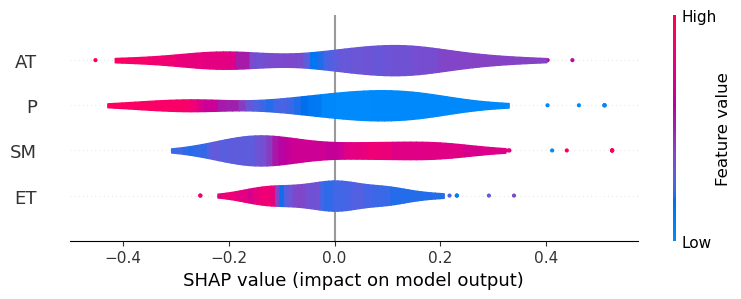

In [41]:
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'violin')

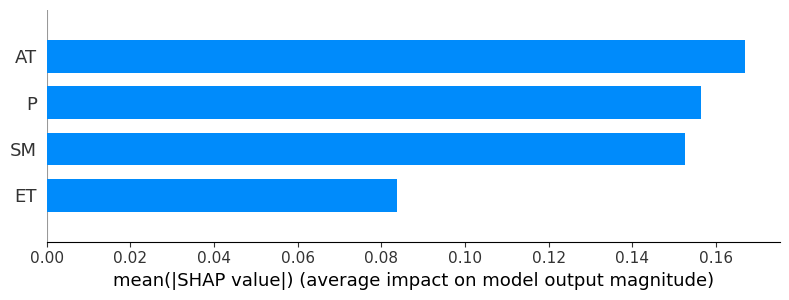

In [43]:
# Feature importance plot
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')

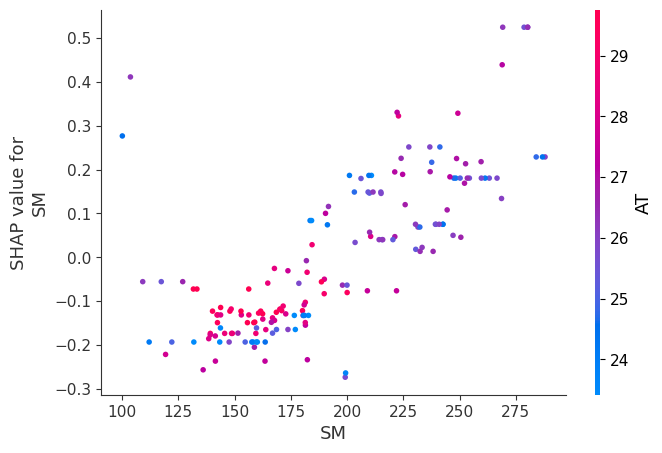

In [44]:
# Dependence plot
shap.dependence_plot(3, shap_valuestr, X_train, feature_names = X_train.columns)

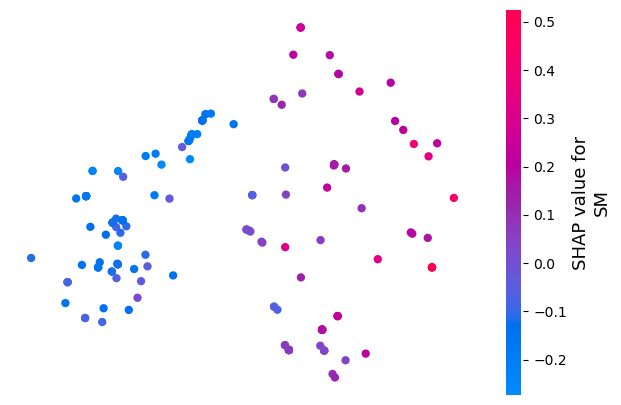

In [46]:
# Embedding plot: 2D projection of shap values using PCA for visualization
shap.embedding_plot('SM', explainer.shap_values(X_train), feature_names = X_train.columns)

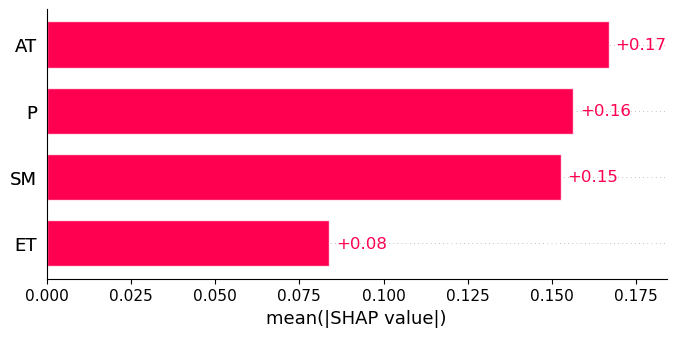

In [48]:
# Global plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

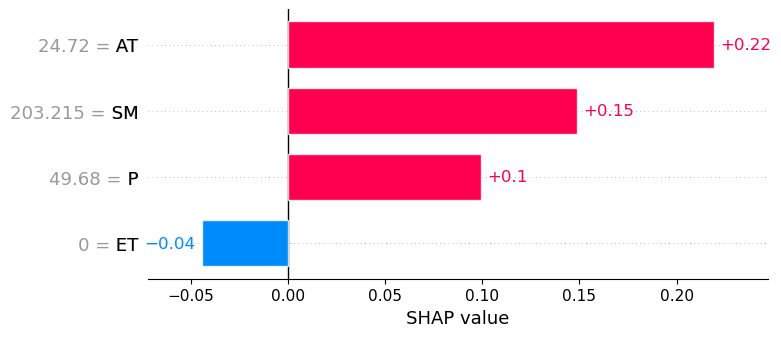

In [49]:
# Local plot
shap.plots.bar(shap_valuestr[0])

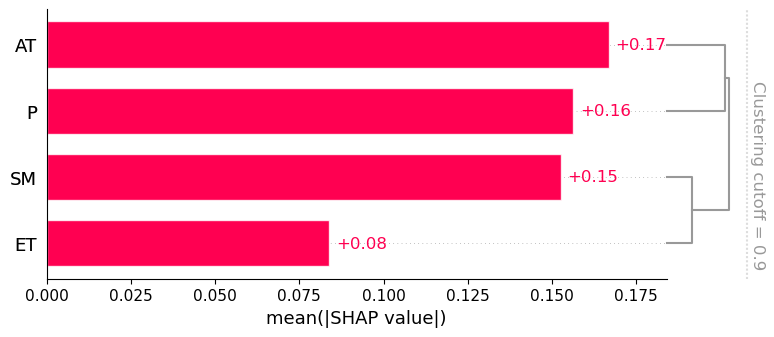

In [52]:
# Feature clustering plot
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_valuestr, clustering = clustering, clustering_cutoff = 0.9)

In [53]:
# Shap values on the testing dataset
shap_valuests = explainer(X_test)

In [54]:
shap_valuests

.values =
array([[ 0.1046563 ,  0.13184021,  0.18877094, -0.13239994],
       [-0.09336033,  0.01849503, -0.25953802,  0.18062325],
       [ 0.01267433,  0.13683853,  0.16964947, -0.19305016],
       [ 0.00425087, -0.32420364,  0.0126326 , -0.14431643],
       [ 0.06644268,  0.16148224,  0.26153824,  0.11600552],
       [ 0.09268364, -0.20727707,  0.14068092, -0.17336754],
       [-0.01353397,  0.04956985, -0.03152756,  0.02010967],
       [-0.01741077,  0.03638992, -0.01070826,  0.0163459 ],
       [ 0.03723698,  0.29495865, -0.1245512 ,  0.1232127 ],
       [ 0.11380592, -0.24146347,  0.14512474, -0.16475281],
       [-0.15208294,  0.11250488, -0.3646542 ,  0.04033073],
       [-0.14093124, -0.22797852,  0.03881737, -0.12154011],
       [ 0.10858894, -0.26189194, -0.05028172, -0.08219028],
       [ 0.00445601,  0.38548592,  0.00966333,  0.31111523],
       [-0.00439064,  0.28124268,  0.32294399,  0.18678192],
       [-0.06698532, -0.23280045,  0.04016186, -0.14416744],
       [ 0.015

In [ ]:
# Some shap plots

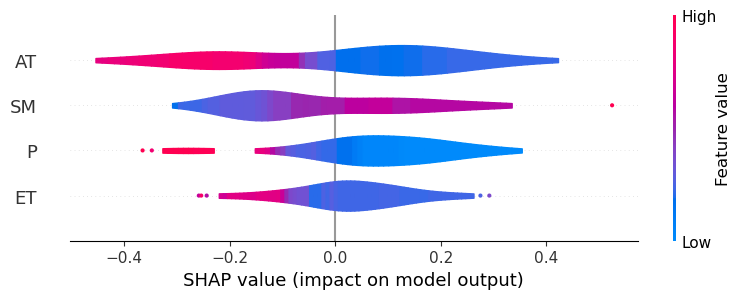

In [56]:
# Summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'violin')

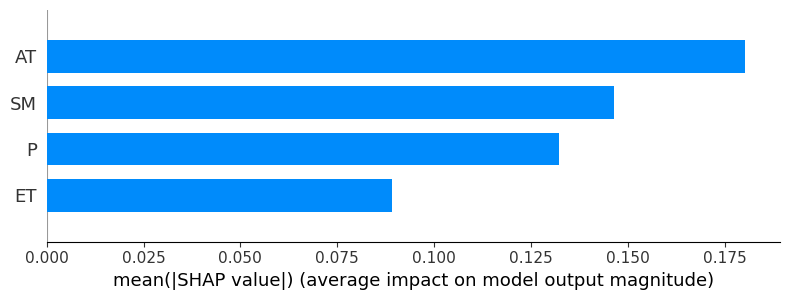

In [57]:
# Freature importance
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar')

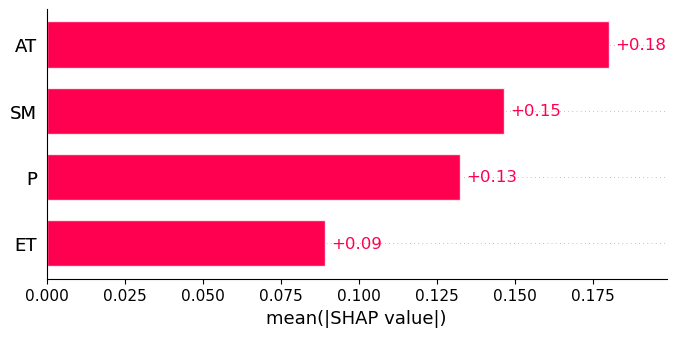

In [59]:
# Global slot
shap_valuests = explainer(X_test)
shap.plots.bar(shap_valuests)

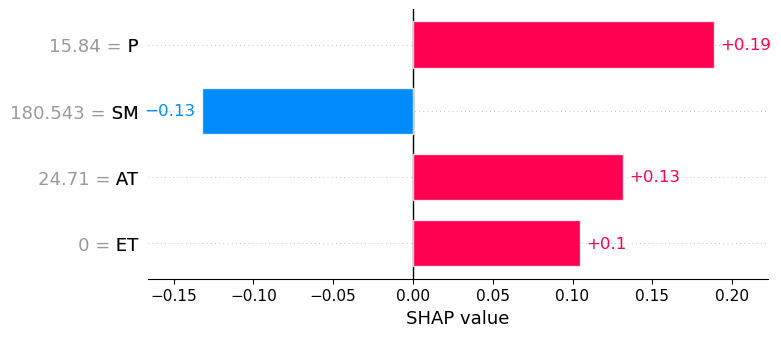

In [60]:
# Local plot
shap.plots.bar(shap_valuests[0])

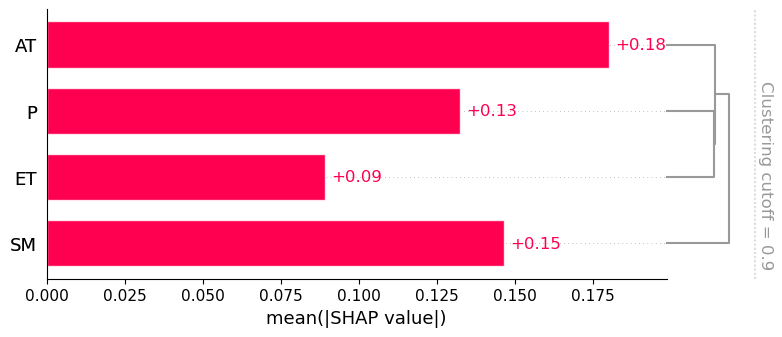

In [65]:
# Feature clustering
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering, clustering_cutoff = 0.9)

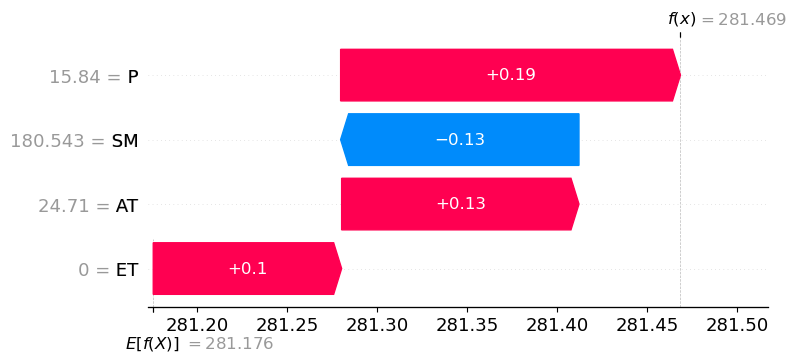

In [66]:
# Waterfall plot
shap.plots.waterfall(shap_valuests[0])

In [69]:
# Force plot
shap.plots.force(shap_valuests[0])